## Hyperparameter Tuning: GridSearchCV and RandomizedSearchCV, Explained

Every machine learning model that you train has a set of parameters or model coefficients. The goal of the machine learning algorithm—formulated as an optimization problem—is to learn the optimal values of these parameters. 

In addition, machine learning models also have a set of hyperparameters. Such as the value of K, the number of neighbors, in the K-Nearest Neighbors algorithm. Or the batch size when training a deep neural network, and more.

These hyperparameters are not learned by the model. But rather specified by the developer. They influence model performance and are tunable. So how do you find the best values for these hyperparameters? This process is called hyperparameter optimization or hyperparameter tuning.

The two most common hyperparameter tuning techniques include:

Grid search
Randomized search

[Visit For more details](https://www.kdnuggets.com/hyperparameter-tuning-gridsearchcv-and-randomizedsearchcv-explained)

## 4 Ways to Evaluate your Machine Learning Model: Cross-Validation Techniques (with Python code)

### Introduction

Whenever we build any machine learning model, we feed it with initial data to train the model. And then we feed some unknown data (test data) to understand how well the model performs and generalized over unseen data. If the model performs well on the unseen data, it’s consistent and is able to predict with good accuracy on a wide range of input data; then this model is stable.

But this is not the case always! Machine learning models are not always stable and we have to evaluate the stability of the machine learning model. That is where Cross Validation comes into the picture.

“In simple terms, Cross-Validation is a technique used to assess how well our Machine learning models perform on unseen data”

According to Wikipedia, Cross-Validation is the process of assessing how the results of a statistical analysis will generalize to an independent data set.

[Visit For more details](https://www.analyticsvidhya.com/blog/2021/05/4-ways-to-evaluate-your-machine-learning-model-cross-validation-techniques-with-python-code/)
[visit sklearn](https://scikit-learn.org/stable/modules/cross_validation.html)

## K-Fold Cross Validation Technique and its Essentials
Guys! Before getting started, just have a look at the below visualization and tell me, what are your observations? Yes, here we’re monitoring the performance of the model before moving into production. Why is this necessary for the ML space? Of course, this is a very important stage during model accuracy validation, whatever you can say

[Visit For more details](https://www.analyticsvidhya.com/blog/2022/02/k-fold-cross-validation-technique-and-its-essentials/)

[visit sklearn](https://scikit-learn.org/stable/modules/cross_validation.html)

The parameters you've listed are typically associated with the `make_classification` function from `sklearn.datasets`, which is used to generate a random n-class classification problem. This function is often used to create synthetic datasets for testing machine learning algorithms. Here's what each parameter means:

1. `n_samples`: The total number of samples.
2. `n_features`: The total number of features.
3. `n_informative`: The number of informative features, i.e., features that are useful for classifying the samples.
4. `n_redundant`: The number of redundant features, i.e., features that can be derived from the informative features.
5. `n_repeated`: The number of duplicated features, drawn randomly from the informative and redundant features.
6. `n_classes`: The number of classes (or labels) in the dataset.
7. `n_clusters_per_class`: The number of clusters per class.
8. `weights`: The proportions of samples assigned to each class. If None, then classes are balanced.
9. `flip_y`: The fraction of samples whose class are randomly exchanged. Larger values introduce more noise and make the classification task harder.
10. `class_sep`: The factor multiplying the hypercube size. Larger values spread out the clusters/classes and make the classification task easier.
11. `hypercube`: If True, the clusters are put on the vertices of a hypercube. If False, the clusters are put on the vertices of a random polytope.
12. `shift`: Shift features by the specified value. If None, then features are shifted by a random value drawn in [-class_sep, class_sep].
13. `scale`: Multiply features by the specified value. If None, then features are scaled by a random value drawn in [1, 100]. Note that scaling happens after shifting.
14. `shuffle`: If True, shuffle the samples and the features.
15. `random_state`: Determines random number generation for dataset creation. Pass an int for reproducible output across multiple function calls.

In the context of logistic regression, you would use this function to generate a synthetic dataset for training and testing your model. The parameters allow you to control the complexity and difficulty of the classification problem, which can be useful for testing how well your model handles different types of data.

In [25]:
# Lets see more compex data 

# make a prediction logistic regression model 
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression

# define dataset
X,y = make_classification(n_samples=1000,n_features=10,n_informative=5 , n_redundant=5 , n_classes=2 , random_state=1)



In [26]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2,random_state=42)

## Model Training Hyperparameter Tuning

## GridsearchCV

In [27]:
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")


These are parameters for the `LogisticRegression` class in `sklearn.linear_model`. Here's what each one means:

1. `solver`: This parameter specifies the algorithm to use in the optimization problem. Different solvers converge at different rates and have different requirements.

   - `'newton-cg'`: Newton's method. It's a good choice for multiclass problems and it handles L2 or no penalty.
   - `'lbfgs'`: Stands for Limited-memory Broyden–Fletcher–Goldfarb–Shanno. It's an optimization algorithm in the family of quasi-Newton methods. It handles L2 or no penalty.
   - `'liblinear'`: A Library for Large Linear Classification. It uses a coordinate descent algorithm. It's a good choice for small datasets and it handles L1 penalty.
   - `'sag'`: Stochastic Average Gradient descent. It's a variant of SGD. It's faster for large datasets, and it handles L2 or no penalty.
   - `'saga'`: Stochastic Average Gradient descent. It's a variant of SAG that also supports the non-smooth penalty='l1' option. This is therefore the solver of choice for sparse multinomial logistic regression and it's faster for large datasets.

2. `max_iter`: Maximum number of iterations taken for the solvers to converge. A low number can cause the solver to not converge, while a high number can cause longer training times.

3. `multi_class`: This parameter specifies the approach to handling multiple classes. 

   - `'auto'`: This will select `'ovr'` if the data is binary, or if `solver='liblinear'`, and otherwise it will select `'multinomial'`.
   - `'ovr'`: Stands for One-vs-Rest. In this approach, a separate model is trained for each class predicted against all other classes.
   - `'multinomial'`: This is the softmax approach. In this approach, logistic regression is generalized to handle multiple classes directly, instead of training separate binary classifiers.

These parameters can significantly affect the performance and training speed of your logistic regression model, so it's often a good idea to experiment with different values to see what works best for your specific problem.

In [28]:
parameters = {'C':[0.001,0.01,0.1,1,10,100,1000], 'penalty':['l1','l2','elasticnet','none'] , 'solver':['newton-cg','lbfgs','liblinear'] , 'max_iter':[100,1000,10000], 'multi_class':['auto','ovr','multinomial'] }

In [29]:
classifier = LogisticRegression()


In [30]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [31]:
clf = GridSearchCV(classifier,param_grid=parameters,cv=5)


In [32]:
clf.fit(X_train_scaled,y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'max_iter': [100, 1000, 10000],
                         'multi_class': ['auto', 'ovr', 'multinomial'],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear']})

In [33]:
clf.best_params_

{'C': 0.01,
 'max_iter': 100,
 'multi_class': 'multinomial',
 'penalty': 'l2',
 'solver': 'newton-cg'}

In [34]:
clf.best_score_

0.82

In [35]:
classifier = LogisticRegression( C = 0.01,
 max_iter = 100,
 multi_class = 'auto',
 penalty = 'l2',
 solver = 'newton-cg' )

In [37]:

classifier.fit(X_train_scaled, y_train)  # Fit the classifier with the training data
y_pred = classifier.predict(X_test_scaled)
y_pred

array([0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       0, 1])

In [38]:
classifier.predict_proba(X_test_scaled)

array([[0.6521206 , 0.3478794 ],
       [0.33446825, 0.66553175],
       [0.26041897, 0.73958103],
       [0.18296395, 0.81703605],
       [0.70184452, 0.29815548],
       [0.66283088, 0.33716912],
       [0.89925679, 0.10074321],
       [0.42555891, 0.57444109],
       [0.57324607, 0.42675393],
       [0.52819836, 0.47180164],
       [0.26685348, 0.73314652],
       [0.67665339, 0.32334661],
       [0.75011696, 0.24988304],
       [0.7905195 , 0.2094805 ],
       [0.02028662, 0.97971338],
       [0.14248619, 0.85751381],
       [0.6648983 , 0.3351017 ],
       [0.72071604, 0.27928396],
       [0.38359722, 0.61640278],
       [0.06989397, 0.93010603],
       [0.62204681, 0.37795319],
       [0.62441189, 0.37558811],
       [0.67310679, 0.32689321],
       [0.62857076, 0.37142924],
       [0.25080698, 0.74919302],
       [0.16622105, 0.83377895],
       [0.60501634, 0.39498366],
       [0.05367538, 0.94632462],
       [0.11794302, 0.88205698],
       [0.8151599 , 0.1848401 ],
       [0.

In [45]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix , classification_report

In [46]:
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Precision: ", precision_score(y_test, y_pred))
print("Recall: ", recall_score(y_test, y_pred))
print("F1 Score: ", f1_score(y_test, y_pred))
print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred))
print("Classification Report: \n", classification_report(y_test, y_pred))

Accuracy:  0.8
Precision:  0.9058823529411765
Recall:  0.7064220183486238
F1 Score:  0.7938144329896907
Confusion Matrix: 
 [[83  8]
 [32 77]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.72      0.91      0.81        91
           1       0.91      0.71      0.79       109

    accuracy                           0.80       200
   macro avg       0.81      0.81      0.80       200
weighted avg       0.82      0.80      0.80       200



This Python code is using scikit-learn and matplotlib to plot a Precision-Recall curve for a set of predictions `y_pred` against the actual values `y_test`. Here's a step-by-step explanation:

1. `precision_recall_curve(y_test, y_pred)`: This function computes the precision-recall pairs for different probability thresholds. The precision is the ratio `tp / (tp + fp)` where `tp` is the number of true positives and `fp` the number of false positives. The recall is the ratio `tp / (tp + fn)` where `tp` is the number of true positives and `fn` the number of false negatives.

2. `plt.plot(recall, precision, marker='.', label='Precision-Recall Curve')`: This line plots the precision-recall curve. Each point on the curve represents a different threshold.

3. `plt.plot([0, 1], [sum(y_test) / len(y_test)] * 2, linestyle='--', color='red')`: This line plots a horizontal dashed line that represents a random classifier. The height of this line is equal to the proportion of positive samples in `y_test`.

4. `average_precision_score(y_test, y_pred)`: This function computes the average precision (AP) from prediction scores. The average precision summarizes a precision-recall curve as the weighted mean of precisions achieved at each threshold, with the increase in recall from the previous threshold used as the weight.

5. `auc(recall, precision)`: This function computes the area under the precision-recall curve (AUC). The AUC summarizes the performance of the classifier over all thresholds.

6. The next few lines set the labels for the x and y axes, the title of the plot (which includes the AUC), and the legend, and then display the plot with `plt.show()`.

In summary, this code is evaluating the performance of a binary classifier by plotting its precision-recall curve and computing the average precision and the area under the precision-recall curve.

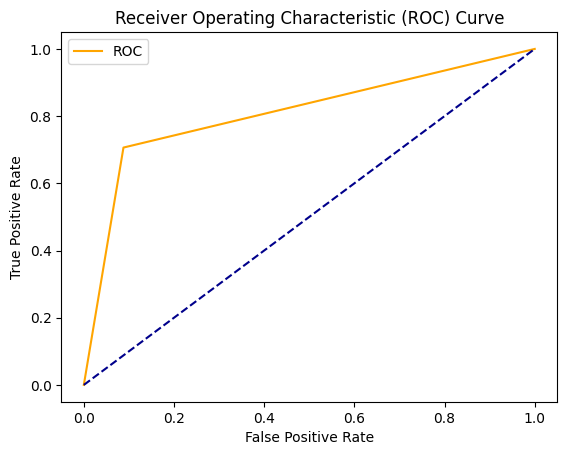

0.8092549652182679

In [48]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
roc_curve(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()
roc_auc_score(y_test, y_pred)


This Python code is using scikit-learn and matplotlib to plot a Receiver Operating Characteristic (ROC) curve and calculate the Area Under the Curve (AUC) for a set of predictions `y_pred` against the actual values `y_test`. Here's a step-by-step explanation:

1. `roc_curve(y_test, y_pred)`: This function computes the false positive rate (FPR) and true positive rate (TPR) for different probability thresholds. The FPR is the ratio `fp / (fp + tn)` where `fp` is the number of false positives and `tn` the number of true negatives. The TPR is the ratio `tp / (tp + fn)` where `tp` is the number of true positives and `fn` the number of false negatives.

2. `plt.plot(fpr, tpr, color='orange', label='ROC')`: This line plots the ROC curve. Each point on the curve represents a different threshold.

3. `plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')`: This line plots a diagonal dashed line that represents a random classifier.

4. The next few lines set the labels for the x and y axes, the title of the plot, and the legend, and then display the plot with `plt.show()`.

5. `roc_auc_score(y_test, y_pred)`: This function computes the area under the ROC curve (AUC). The AUC summarizes the performance of the classifier over all thresholds.

In summary, this code is evaluating the performance of a binary classifier by plotting its ROC curve and computing the AUC.

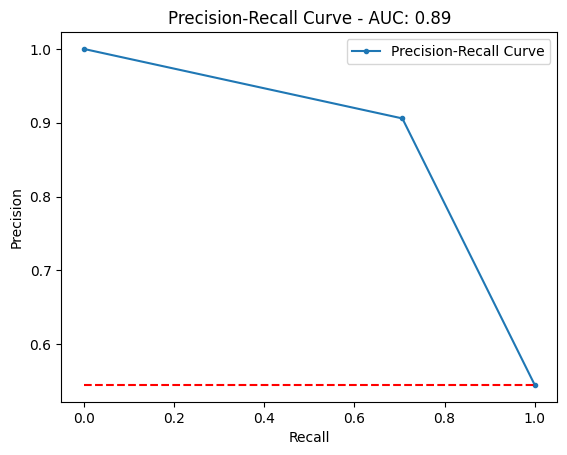

In [56]:
from sklearn.metrics import precision_recall_curve, auc, average_precision_score 
import matplotlib.pyplot as plt

precision, recall, thresholds = precision_recall_curve(y_test, y_pred)
plt.plot(recall, precision, marker='.', label='Precision-Recall Curve')

# Plot horizontal line with height equal to the proportion of positive samples
plt.plot([0, 1], [sum(y_test) / len(y_test)] * 2, linestyle='--', color='red')

average_precision = average_precision_score(y_test, y_pred)
auc_score = auc(recall, precision)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - AUC: {:.2f}'.format(auc_score))
plt.legend()
plt.show()

## RandomizedSearchCV

In [57]:
from sklearn.model_selection import RandomizedSearchCV

In [58]:
random_clf = RandomizedSearchCV(LogisticRegression(),param_distributions=parameters,cv=5)

In [59]:
random_clf.fit(X_train_scaled,y_train)

RandomizedSearchCV(cv=5, estimator=LogisticRegression(),
                   param_distributions={'C': [0.001, 0.01, 0.1, 1, 10, 100,
                                              1000],
                                        'max_iter': [100, 1000, 10000],
                                        'multi_class': ['auto', 'ovr',
                                                        'multinomial'],
                                        'penalty': ['l1', 'l2', 'elasticnet',
                                                    'none'],
                                        'solver': ['newton-cg', 'lbfgs',
                                                   'liblinear']})

In [60]:
random_clf.best_params_

{'solver': 'liblinear',
 'penalty': 'l1',
 'multi_class': 'auto',
 'max_iter': 1000,
 'C': 0.1}

In [61]:
random_clf.best_score_

0.81375

In [62]:
classifier= LogisticRegression(solver= 'liblinear',
 penalty='l1',
 multi_class= 'auto',
 max_iter=1000,
 C= 0.1)

In [63]:
classifier.fit(X_train_scaled, y_train)  # Fit the classifier with the training data

LogisticRegression(C=0.1, max_iter=1000, penalty='l1', solver='liblinear')

In [64]:
y_pred = classifier.predict(X_test_scaled)

In [65]:
y_pred

array([0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       0, 1])

In [66]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix , classification_report

In [67]:
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Precision: ", precision_score(y_test, y_pred))
print("Recall: ", recall_score(y_test, y_pred))
print("F1 Score: ", f1_score(y_test, y_pred))
print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred))
print("Classification Report: \n", classification_report(y_test, y_pred))

Accuracy:  0.785
Precision:  0.8586956521739131
Recall:  0.7247706422018348
F1 Score:  0.7860696517412935
Confusion Matrix: 
 [[78 13]
 [30 79]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.72      0.86      0.78        91
           1       0.86      0.72      0.79       109

    accuracy                           0.79       200
   macro avg       0.79      0.79      0.78       200
weighted avg       0.80      0.79      0.79       200



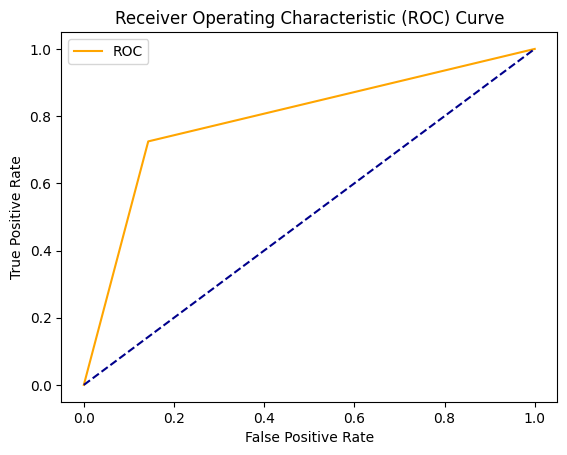

0.790956749672346

In [68]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
roc_curve(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()
roc_auc_score(y_test, y_pred)


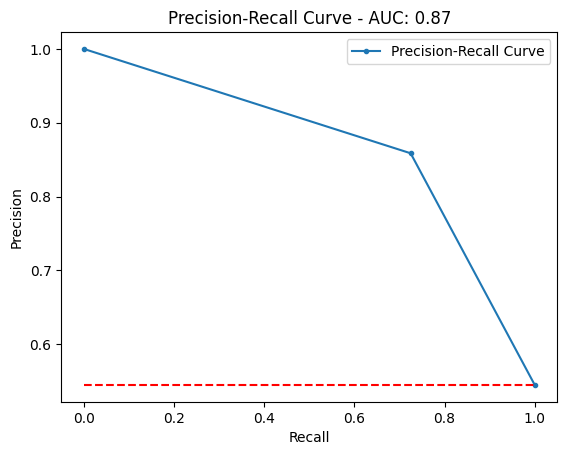

In [69]:
from sklearn.metrics import precision_recall_curve, auc, average_precision_score 
import matplotlib.pyplot as plt

precision, recall, thresholds = precision_recall_curve(y_test, y_pred)
plt.plot(recall, precision, marker='.', label='Precision-Recall Curve')

# Plot horizontal line with height equal to the proportion of positive samples
plt.plot([0, 1], [sum(y_test) / len(y_test)] * 2, linestyle='--', color='red')

average_precision = average_precision_score(y_test, y_pred)
auc_score = auc(recall, precision)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - AUC: {:.2f}'.format(auc_score))
plt.legend()
plt.show()